In [1]:
import featuretools as ft
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. Quick start

## 1.1. Loading and inspecting data

In [2]:
data = ft.demo.load_mock_customer()

In [3]:
sessions_df = data["sessions"]
sessions_df.head()
sessions_df.shape
sessions_df['session_id'].unique()

,session_id,customer_id,device,session_start
0,1,2,desktop,2014-01-01 00:00:00
1,2,5,mobile,2014-01-01 00:17:20
2,3,4,mobile,2014-01-01 00:28:10
3,4,1,mobile,2014-01-01 00:44:25
4,5,4,mobile,2014-01-01 01:11:30


(35, 4)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35])

In [4]:
customer_df = data["customers"]
customer_df.head()
customer_df.shape
customer_df['customer_id'].unique()

,customer_id,zip_code,join_date,date_of_birth
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


(5, 4)

array([1, 2, 3, 4, 5])

In [5]:
transactions_df = data["transactions"]
transactions_df.head()
transactions_df.shape
transactions_df['transaction_id'].nunique()

,transaction_id,session_id,transaction_time,product_id,amount
0,298,1,2014-01-01 00:00:00,5,127.64
1,2,1,2014-01-01 00:01:05,2,109.48
2,308,1,2014-01-01 00:02:10,3,95.06
3,116,1,2014-01-01 00:03:15,4,78.92
4,371,1,2014-01-01 00:04:20,3,31.54


(500, 5)

500

## 1.2. Feature matrix and features, given a dictionary of entities and a list of relationships.

In [6]:
entities = {"customers" : (customer_df, "customer_id"),
            "sessions" : (sessions_df, "session_id", "session_start"),
            "transactions" : (transactions_df, "transaction_id", "transaction_time")
            }

In [7]:
relationships = [("sessions", "session_id", "transactions", "session_id"),
                 ("customers", "customer_id", "sessions", "customer_id")]

In [8]:
feature_matrix_customers, features_defs = ft.dfs(entities=entities, relationships=relationships, target_entity="customers")

In [9]:
feature_matrix_customers

,zip_code,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),...,SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.customer_id),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.customer_id),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
1,60091,8,mobile,3,126,139.43,71.631905,5.81,4,5,...,1057.97,582.193117,78.59,40,-0.476122,312.745952,1,mobile,1,3
2,13244,7,desktop,3,93,146.81,77.422366,8.73,4,5,...,931.63,548.905851,154.60,35,-0.277640,258.700528,2,desktop,1,3
3,13244,6,desktop,3,93,149.15,67.060430,5.89,1,5,...,847.63,405.237462,66.21,29,2.286086,257.299895,3,desktop,1,3
4,60091,8,mobile,3,109,149.95,80.070459,5.73,2,5,...,1157.99,649.657515,131.51,37,0.002764,356.125829,4,mobile,1,3
5,60091,6,mobile,3,79,149.02,80.375443,7.55,5,5,...,839.76,472.231119,86.49,30,0.014384,259.873954,5,mobile,1,3


In [10]:
features_defs

[<Feature: zip_code>,
 <Feature: COUNT(sessions)>,
 <Feature: MODE(sessions.device)>,
 <Feature: NUM_UNIQUE(sessions.device)>,
 <Feature: COUNT(transactions)>,
 <Feature: MAX(transactions.amount)>,
 <Feature: MEAN(transactions.amount)>,
 <Feature: MIN(transactions.amount)>,
 <Feature: MODE(transactions.product_id)>,
 <Feature: NUM_UNIQUE(transactions.product_id)>,
 <Feature: SKEW(transactions.amount)>,
 <Feature: STD(transactions.amount)>,
 <Feature: SUM(transactions.amount)>,
 <Feature: DAY(date_of_birth)>,
 <Feature: DAY(join_date)>,
 <Feature: MONTH(date_of_birth)>,
 <Feature: MONTH(join_date)>,
 <Feature: WEEKDAY(date_of_birth)>,
 <Feature: WEEKDAY(join_date)>,
 <Feature: YEAR(date_of_birth)>,
 <Feature: YEAR(join_date)>,
 <Feature: MAX(sessions.COUNT(transactions))>,
 <Feature: MAX(sessions.MEAN(transactions.amount))>,
 <Feature: MAX(sessions.MIN(transactions.amount))>,
 <Feature: MAX(sessions.NUM_UNIQUE(transactions.product_id))>,
 <Feature: MAX(sessions.SKEW(transactions.amount)

In [11]:
feature_matrix_sessions, features_defs = ft.dfs(entities=entities, relationships=relationships,
                                                 target_entity="sessions")

In [12]:
feature_matrix_sessions.shape

(35, 44)

In [13]:
features_defs[18]

<Feature: MODE(transactions.WEEKDAY(transaction_time))>

In [14]:
feature = features_defs[18]
ft.describe_feature(feature)

'The most frequently occurring value of the day of the week of the "transaction_time" of all instances of "transactions" for each "session_id" in "sessions".'

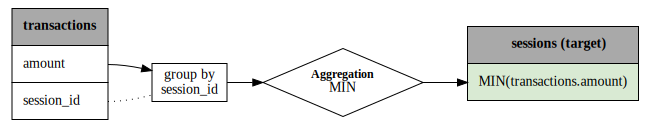

In [30]:
ft.graph_feature(feature)

# 2. Step-by-step guide of building feature matrix with ft

## 2.1. Loading data

In [15]:
transactions_df = data["transactions"].merge(data["sessions"]).merge(data["customers"])
transactions_df

,transaction_id,session_id,transaction_time,product_id,amount,customer_id,device,session_start,zip_code,join_date,date_of_birth
0,298,1,2014-01-01 00:00:00,5,127.64,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18
1,2,1,2014-01-01 00:01:05,2,109.48,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18
2,308,1,2014-01-01 00:02:10,3,95.06,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18
3,116,1,2014-01-01 00:03:15,4,78.92,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18
4,371,1,2014-01-01 00:04:20,3,31.54,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18
...,...,...,...,...,...,...,...,...,...,...,...
495,112,35,2014-01-01 08:56:15,5,55.42,3,mobile,2014-01-01 08:44:20,13244,2011-08-13 15:42:34,2003-11-21
496,111,35,2014-01-01 08:57:20,3,34.87,3,mobile,2014-01-01 08:44:20,13244,2011-08-13 15:42:34,2003-11-21
497,276,35,2014-01-01 08:58:25,1,10.94,3,mobile,2014-01-01 08:44:20,13244,2011-08-13 15:42:34,2003-11-21
498,266,35,2014-01-01 08:59:30,5,19.86,3,mobile,2014-01-01 08:44:20,13244,2011-08-13 15:42:34,2003-11-21


In [16]:
transactions_df.shape

(500, 11)

## 2.2. Creating a new Entityset and adding a New Entity

In [17]:
# Create a new entityset
es = ft.EntitySet(id="customer_data")
es = es.entity_from_dataframe(entity_id="transactions", dataframe=transactions_df, index="transaction_id", time_index="transaction_time",
                              variable_types={"product_id": ft.variable_types.Categorical, "zip_code": ft.variable_types.ZIPCode})

* The index parameter specifies the column that <span style="color:yellow"> UNIQUELY </span> identifies rows in the dataframe
* The time_index parameter tells Featuretools when the data was created.
* The variable_types parameter indicates that “product_id” should be interpreted as a Categorical variable, even though it just an integer in the underlying data.


In [18]:
es
es["transactions"].variables

Entityset: customer_data
  Entities:
    transactions [Rows: 500, Columns: 11]
  Relationships:
    No relationships

[<Variable: transaction_id (dtype = index)>,
 <Variable: session_id (dtype = numeric)>,
 <Variable: transaction_time (dtype: datetime_time_index, format: None)>,
 <Variable: amount (dtype = numeric)>,
 <Variable: customer_id (dtype = numeric)>,
 <Variable: device (dtype = categorical)>,
 <Variable: session_start (dtype: datetime, format: None)>,
 <Variable: join_date (dtype: datetime, format: None)>,
 <Variable: date_of_birth (dtype: datetime, format: None)>,
 <Variable: product_id (dtype = categorical)>,
 <Variable: zip_code (dtype = zip_code)>]

In [19]:
products_df = data["products"]
es = es.entity_from_dataframe(entity_id="products", dataframe=products_df, index="product_id")
es

Entityset: customer_data
  Entities:
    transactions [Rows: 500, Columns: 11]
    products [Rows: 5, Columns: 2]
  Relationships:
    No relationships

## 2.3 Adding a Relationship

In [20]:
new_relationship = ft.Relationship(es["products"]["product_id"], es["transactions"]["product_id"])
es = es.add_relationship(new_relationship)
es

Entityset: customer_data
  Entities:
    transactions [Rows: 500, Columns: 11]
    products [Rows: 5, Columns: 2]
  Relationships:
    transactions.product_id -> products.product_id

## 2.4. Creating entity from existing table

In [21]:
es = es.normalize_entity(base_entity_id="transactions",
                         new_entity_id="sessions",
                         index="session_id",
                         make_time_index="session_start",
                         additional_variables=["device", "customer_id", "zip_code", "session_start", "join_date"])
es

Entityset: customer_data
  Entities:
    transactions [Rows: 500, Columns: 6]
    products [Rows: 5, Columns: 2]
    sessions [Rows: 35, Columns: 6]
  Relationships:
    transactions.product_id -> products.product_id
    transactions.session_id -> sessions.session_id

In [22]:
es = es.normalize_entity(base_entity_id="sessions", 
                         new_entity_id="customers", 
                         index="customer_id",
                         make_time_index="join_date",
                         additional_variables=["zip_code", "join_date"])
es

Entityset: customer_data
  Entities:
    transactions [Rows: 500, Columns: 6]
    products [Rows: 5, Columns: 2]
    sessions [Rows: 35, Columns: 4]
    customers [Rows: 5, Columns: 3]
  Relationships:
    transactions.product_id -> products.product_id
    transactions.session_id -> sessions.session_id
    sessions.customer_id -> customers.customer_id

## 2.5. Calculating feature matrix

In [23]:
feature_matrix, feature_defs = ft.dfs(entityset=es, 
                                      target_entity="sessions")

In [24]:
feature_matrix

,device,customer_id,COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),STD(transactions.amount),...,customers.MIN(transactions.amount),customers.MODE(transactions.product_id),customers.NUM_UNIQUE(transactions.product_id),customers.SKEW(transactions.amount),customers.STD(transactions.amount),customers.SUM(transactions.amount),customers.DAY(join_date),customers.MONTH(join_date),customers.WEEKDAY(join_date),customers.YEAR(join_date)
session_id,,,,,,,,,,,,,,,,,,,,,
1,desktop,2,16,141.66,76.813125,20.91,3,5,0.295458,41.600976,...,8.73,4,5,0.098259,37.705178,7200.28,15,4,6,2012
2,mobile,5,10,135.25,74.696000,9.32,5,5,-0.160550,45.893591,...,7.55,5,5,-0.025941,44.095630,6349.66,17,7,5,2010
3,mobile,4,15,147.73,88.600000,8.70,1,5,-0.324012,46.240016,...,5.73,2,5,-0.036348,45.068765,8727.68,8,4,4,2011
4,mobile,1,25,129.00,64.557200,6.29,5,5,0.234349,40.187205,...,5.81,4,5,0.019698,40.442059,9025.62,17,4,6,2011
5,mobile,4,11,139.20,70.638182,7.43,5,5,0.336381,48.918663,...,5.73,2,5,-0.036348,45.068765,8727.68,8,4,4,2011
6,tablet,1,15,139.23,84.440000,8.74,4,5,-0.134754,42.654755,...,5.81,4,5,0.019698,40.442059,9025.62,17,4,6,2011
7,tablet,3,15,146.31,62.791333,8.19,1,5,0.618455,47.264797,...,5.89,1,5,0.418230,43.683296,6236.62,13,8,5,2011
8,tablet,4,18,143.85,75.081111,12.59,1,5,0.200676,44.213242,...,5.73,2,5,-0.036348,45.068765,8727.68,8,4,4,2011
9,desktop,1,15,132.72,70.135333,5.81,1,5,0.226337,46.905665,...,5.81,4,5,0.019698,40.442059,9025.62,17,4,6,2011


In [25]:
feature_defs

[<Feature: device>,
 <Feature: customer_id>,
 <Feature: COUNT(transactions)>,
 <Feature: MAX(transactions.amount)>,
 <Feature: MEAN(transactions.amount)>,
 <Feature: MIN(transactions.amount)>,
 <Feature: MODE(transactions.product_id)>,
 <Feature: NUM_UNIQUE(transactions.product_id)>,
 <Feature: SKEW(transactions.amount)>,
 <Feature: STD(transactions.amount)>,
 <Feature: SUM(transactions.amount)>,
 <Feature: DAY(session_start)>,
 <Feature: MONTH(session_start)>,
 <Feature: WEEKDAY(session_start)>,
 <Feature: YEAR(session_start)>,
 <Feature: customers.zip_code>,
 <Feature: MODE(transactions.DAY(date_of_birth))>,
 <Feature: MODE(transactions.DAY(transaction_time))>,
 <Feature: MODE(transactions.MONTH(date_of_birth))>,
 <Feature: MODE(transactions.MONTH(transaction_time))>,
 <Feature: MODE(transactions.WEEKDAY(date_of_birth))>,
 <Feature: MODE(transactions.WEEKDAY(transaction_time))>,
 <Feature: MODE(transactions.YEAR(date_of_birth))>,
 <Feature: MODE(transactions.YEAR(transaction_time))>,

In [26]:
feature = features_defs[5]
ft.describe_feature(feature)

'The minimum of the "amount" of all instances of "transactions" for each "session_id" in "sessions".'

## 2.6. Calculating custom feature matrix

In [27]:
features_defs

[<Feature: customer_id>,
 <Feature: device>,
 <Feature: COUNT(transactions)>,
 <Feature: MAX(transactions.amount)>,
 <Feature: MEAN(transactions.amount)>,
 <Feature: MIN(transactions.amount)>,
 <Feature: MODE(transactions.product_id)>,
 <Feature: NUM_UNIQUE(transactions.product_id)>,
 <Feature: SKEW(transactions.amount)>,
 <Feature: STD(transactions.amount)>,
 <Feature: SUM(transactions.amount)>,
 <Feature: DAY(session_start)>,
 <Feature: MONTH(session_start)>,
 <Feature: WEEKDAY(session_start)>,
 <Feature: YEAR(session_start)>,
 <Feature: customers.zip_code>,
 <Feature: MODE(transactions.DAY(transaction_time))>,
 <Feature: MODE(transactions.MONTH(transaction_time))>,
 <Feature: MODE(transactions.WEEKDAY(transaction_time))>,
 <Feature: MODE(transactions.YEAR(transaction_time))>,
 <Feature: NUM_UNIQUE(transactions.DAY(transaction_time))>,
 <Feature: NUM_UNIQUE(transactions.MONTH(transaction_time))>,
 <Feature: NUM_UNIQUE(transactions.WEEKDAY(transaction_time))>,
 <Feature: NUM_UNIQUE(tr

In [28]:
feature_matrix, feature_defs = ft.dfs(entityset=es, 
                                      target_entity="products", 
                                      agg_primitives = ['mean', 'max', 'count', 'last'],
                                      trans_primitives = ['year', 'month'])

In [29]:
feature_defs

[<Feature: brand>,
 <Feature: COUNT(transactions)>,
 <Feature: LAST(transactions.amount)>,
 <Feature: LAST(transactions.session_id)>,
 <Feature: LAST(transactions.transaction_id)>,
 <Feature: MAX(transactions.amount)>,
 <Feature: MEAN(transactions.amount)>,
 <Feature: LAST(transactions.MONTH(date_of_birth))>,
 <Feature: LAST(transactions.MONTH(transaction_time))>,
 <Feature: LAST(transactions.YEAR(date_of_birth))>,
 <Feature: LAST(transactions.YEAR(transaction_time))>,
 <Feature: LAST(transactions.sessions.customer_id)>,
 <Feature: LAST(transactions.sessions.device)>,
 <Feature: MONTH(LAST(transactions.date_of_birth))>,
 <Feature: MONTH(LAST(transactions.transaction_time))>,
 <Feature: YEAR(LAST(transactions.date_of_birth))>,
 <Feature: YEAR(LAST(transactions.transaction_time))>]